<a href="https://colab.research.google.com/github/chathurapriyashan/Intellihack_reid_coder_23_04/blob/main/question_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler


# Load dataset
data = pd.read_csv('/content/question4-stock-data.csv');
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')  # Convert all possible numbers
data.interpolate(method='linear', inplace=True)  # Now apply interpolation


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


281/281 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - loss: 0.0036 - val_loss: 0.0015
Epoch 2/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 4.1602e-04 - val_loss: 0.0015
Epoch 3/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - loss: 3.3843e-04 - val_loss: 8.9467e-04
Epoch 4/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step - loss: 3.2567e-04 - val_loss: 0.0013
Epoch 5/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: 3.0250e-04 - val_loss: 0.0014
Epoch 6/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - loss: 3.0587e-04 - val_loss: 7.1672e-04
Epoch 7/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - loss: 2.9893e-04 - val_loss: 6.4628e-04
Epoch 8/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - loss: 2.8430e-04 - val_loss: 9.8350e-04
Epoch 9/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - loss: 3.2735e-04 - val_loss: 8.5359e-04
Epoch 10/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - loss: 2.8488e-04 - val_loss: 6.0866e-04
Epoch 11/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - loss: 2.9529e

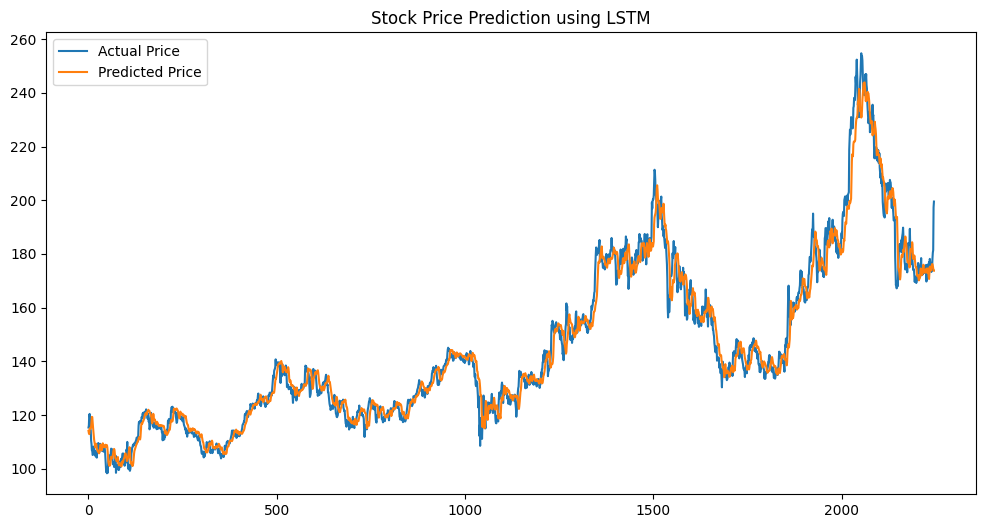

In [10]:
# Selecting relevant features (closing price)
closing_prices = data[['Close']].values
scaler = MinMaxScaler(feature_range=(0, 1))
closing_prices_scaled = scaler.fit_transform(closing_prices)

# Prepare the dataset for LSTM
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 5):  # Predicting 5 days ahead
        X.append(data[i:i + time_step])
        y.append(data[i + time_step + 5])
    return np.array(X), np.array(y)

time_step = 60  # Using past 60 days for prediction
X, y = create_sequences(closing_prices_scaled, time_step)

# Split data into train and test sets
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Define LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual Price')
plt.plot(y_pred_inv, label='Predicted Price')
plt.legend()
plt.title('Stock Price Prediction using LSTM')
plt.show()


In [15]:
from tensorflow import  keras;

In [18]:
# save model data future usage
model.save("lstm_stock_model.h5")  # Save model
model.save("my_model.keras")  # Correct way


In [19]:
print(data.head())

            Unnamed: 0  Adj Close     Close      High       Low      Open  \
Date                                                                        
1980-03-17           0   2.296798  3.291227  3.344743  3.291227  0.000000   
1980-03-18           1   2.306134  3.304606  3.358122  3.304606  0.000000   
1980-03-19           2   2.306134  3.304606  3.304606  3.304606  3.304606   
1980-03-20           3   2.306134  3.304606  3.358122  3.304606  0.000000   
1980-03-21           4   2.362154  3.384880  3.438396  3.384880  0.000000   

             Volume  
Date                 
1980-03-17  41109.0  
1980-03-18   9343.0  
1980-03-19      0.0  
1980-03-20  10277.0  
1980-03-21   8409.0  
